In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
os.chdir(r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025")
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split
from torch.utils.data import Subset
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from PIL import Image
import os
from pathlib import Path
import re

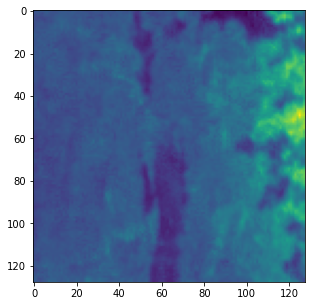

In [23]:
sample = np.load("sample2722.npy")
#sample = sample.transpose(2, 1, 0)
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(100, 102):
    ax.imshow(sample[:, :, channel])

In [24]:
sample.shape

(128, 128, 125)

In [78]:
means = np.zeros((125, 2723))
stds = np.zeros((125, 2723))
max_channel = np.zeros(125)
items_faulty = []
for img_name in os.listdir(r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025\ot\ot"):
    try:
        image = np.load(Path(r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025\ot\ot") / img_name).astype(float)
    except ValueError:
        print(f"Faulty image: {img_name}")
        items_faulty.append(int(re.findall(r'\d+', img_name)[0]))
        continue
    # Check if image is just full of zeros
    if (image == 0).all():
        print(f"Faulty image: {img_name}")
        items_faulty.append(int(re.findall(r'\d+', img_name)[0]))
        continue
    image = image.transpose(2, 1, 0)
    item = int(re.findall(r'\d+', img_name)[0])
    for channel in range(125):
        means[channel, item] = image[channel, :, :].mean()
        stds[channel, item] = image[channel, :, :].std()
        # max_channel[channel] = max(max_channel[channel], image[channel, :, :].max())
means, stds = np.delete(means, items_faulty, axis=1), np.delete(stds, items_faulty, axis=1)
means, stds = means.mean(axis=1), stds.mean(axis=1)

Faulty image: sample1.npy
Faulty image: sample1004.npy
Faulty image: sample1006.npy
Faulty image: sample1009.npy
Faulty image: sample1020.npy
Faulty image: sample1069.npy
Faulty image: sample1070.npy
Faulty image: sample1071.npy
Faulty image: sample1073.npy
Faulty image: sample1076.npy
Faulty image: sample1087.npy
Faulty image: sample1138.npy
Faulty image: sample1140.npy
Faulty image: sample1143.npy
Faulty image: sample1154.npy
Faulty image: sample1205.npy
Faulty image: sample1207.npy
Faulty image: sample1210.npy
Faulty image: sample1271.npy
Faulty image: sample1272.npy
Faulty image: sample1274.npy
Faulty image: sample1277.npy
Faulty image: sample1288.npy
Faulty image: sample133.npy
Faulty image: sample1338.npy
Faulty image: sample1339.npy
Faulty image: sample1341.npy
Faulty image: sample1344.npy
Faulty image: sample135.npy
Faulty image: sample1355.npy
Faulty image: sample138.npy
Faulty image: sample1405.npy
Faulty image: sample1406.npy
Faulty image: sample1408.npy
Faulty image: sample

In [67]:
means + stds

array([ 673.3510957 ,  739.56805273,  771.2275858 ,  789.09266748,
        806.00831073,  820.87803128,  833.76875796,  844.8651799 ,
        856.0091626 ,  873.37832913,  889.49809704,  905.95472491,
        924.17764973,  945.68977322,  967.62859064,  990.73670028,
       1018.89403364, 1051.58622308, 1082.77021394, 1114.00622689,
       1142.91647849, 1170.15883329, 1196.61566441, 1224.38716657,
       1250.35494919, 1276.32706301, 1300.17135617, 1322.9429261 ,
       1343.01905718, 1361.89297506, 1379.21568674, 1396.38824685,
       1412.74580858, 1427.47895579, 1442.74058602, 1457.48671919,
       1471.50370995, 1483.36955236, 1493.30722071, 1501.56504243,
       1509.16801246, 1516.96960395, 1524.52793695, 1532.31329414,
       1540.7764802 , 1548.85183323, 1555.66757817, 1561.33368153,
       1565.95389725, 1571.235376  , 1577.52068395, 1583.77922334,
       1590.8375662 , 1597.88971093, 1605.29985746, 1613.31870263,
       1621.99941575, 1633.55101163, 1650.47413679, 1674.15199

In [79]:
faulty_images = pd.DataFrame({"numbers of faulty images": items_faulty})
faulty_images.to_csv("faulty_images.csv", index=False)

In [80]:
normalization_data = pd.DataFrame({"means": means, "stds": stds})
normalization_data.to_csv("normalization_data.csv", index=False)

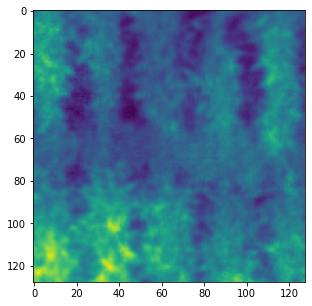

In [58]:
sample1 = np.load("sample2678.npy")
sample1 = sample1.transpose(2, 1, 0)
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample1.shape[0]):
    ax.imshow(sample1[channel, :, :])

In [60]:
sample.shape

(125, 128, 128)

In [68]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), 
    # transforms.ToTensor(), 
    transforms.Normalize(mean=means,
                        std=stds),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=45.0)
])

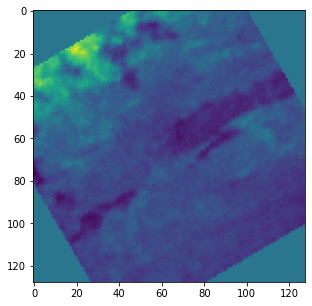

In [81]:
sample = np.load("sample2722.npy").astype(float)
sample = sample.transpose(2, 1, 0)
# for channel in range(sample.shape[0]):
#     sample[channel] = sample[channel] / max_channel[channel]
sample_transform = transform(torch.tensor(sample, dtype=torch.float))
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample_transform.shape[0]):
    ax.imshow(sample_transform[channel])
    

In [82]:
sample_transform[91, 50: 60, 60: 70]

tensor([[-1.0434, -0.9679, -0.9882, -0.8612, -0.8722, -0.9532, -0.9532, -1.0857,
         -1.0526, -1.0194],
        [-1.0397, -0.9679, -0.9274, -0.9274, -0.9974, -1.0231, -1.0710, -1.0857,
         -1.3967, -1.4169],
        [-0.8428, -0.9035, -0.9918, -1.0102, -1.0158, -1.0010, -1.0931, -1.1593,
         -1.5255, -1.6286],
        [-0.8593, -0.8777, -0.9974, -0.9974, -0.9348, -0.9274, -1.3028, -1.5237,
         -1.8181, -1.8052],
        [-0.9422, -0.8225, -1.1041, -1.1299, -1.0378, -1.2274, -1.5310, -1.6341,
         -1.7114, -1.6488],
        [-0.9422, -0.9146, -1.1041, -1.1354, -1.2256, -1.3488, -1.5310, -1.6451,
         -1.7114, -1.5347],
        [-0.7968, -1.1317, -1.0636, -1.5053, -1.4629, -1.3433, -1.3433, -1.5439,
         -1.6286, -1.5476],
        [-1.0250, -1.1961, -1.2734, -1.0378, -1.2311, -1.3139, -1.3433, -1.8549,
         -1.7592, -1.5678],
        [-0.9845, -1.1023, -1.0581, -1.0378, -1.3084, -1.4997, -1.4997, -1.6451,
         -1.7739, -1.8660],
        [-1.1354, -

In [ ]:
# sample = np.load("sample2722.npy")
# sample = sample.transpose(2, 1, 0)
torch.tensor(sample, dtype=torch.float)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


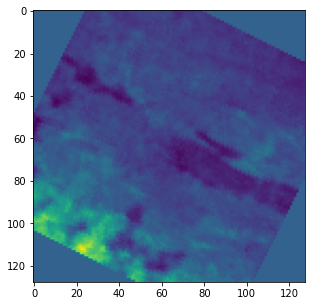

In [352]:
sample_transformed = transform(torch.tensor(sample, dtype=torch.float))
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample.shape[0]):
    ax.imshow(sample_transformed[channel, :, :])
print(sample_transformed[120])

In [382]:
sample = np.load("sample2722.npy").astype(float)
sample = sample.transpose(2, 1, 0)
((sample[102] / max_channel[102] - means[102]) / stds[102])

array([[-0.87050938, -0.78946249, -0.91508517, ..., -0.55645267,
        -0.45919639, -0.4510917 ],
       [-0.7813578 , -0.75299138, -0.91103283, ..., -0.48553663,
        -0.4733796 , -0.55442649],
       [-0.66991832, -0.75096521, -0.79959335, ..., -0.67194449,
        -0.81580273, -0.59292377],
       ...,
       [ 1.01180473,  0.46676437, -0.02154317, ..., -0.70436325,
        -0.6638398 , -0.34370457],
       [ 0.62683199,  0.4282671 ,  0.07773928, ..., -0.82998593,
        -0.78946249, -0.62331635],
       [ 0.43637179, -0.12487796, -0.19984633, ..., -0.49971984,
        -0.92521603, -1.01436762]])

[[-0.9807131  -0.90615039 -1.02032455 ... -0.90149022 -0.81760716
  -0.8106169 ]
 [-0.89683005 -0.87119911 -1.01799446 ... -0.83158767 -0.81993724
  -0.89683005]
 [-0.79430631 -0.86886903 -0.91314064 ... -0.9201309  -1.04595548
  -0.85022835]
 ...
 [ 0.9043256   0.37306624 -0.06731981 ... -0.86653894 -0.83158767
  -0.49139527]
 [ 0.61306499  0.35675564  0.07481537 ... -0.92479107 -0.88750971
  -0.68246223]
 [ 0.36840607 -0.12091177 -0.24207618 ... -0.63586054 -1.02265463
  -1.05993599]]


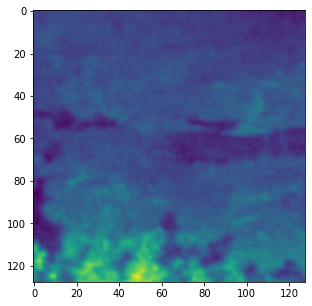

In [351]:
sample = np.load("sample2722.npy").astype(float)
sample = sample.transpose(2, 1, 0)
for channel in range(sample.shape[0]):
    sample[channel] = (sample[channel] / max_channel[channel] - means[channel]) / stds[channel]
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample.shape[0]):
    ax.imshow(sample[channel, :, :])
print(sample[120])

In [86]:
df = pd.read_csv("train.csv")
df

,id,label
0,sample697.npy,7
1,sample54.npy,81
2,sample2270.npy,4
3,sample1401.npy,99
4,sample1901.npy,43
...,...,...
2172,sample2476.npy,40
2173,sample1988.npy,54
2174,sample2018.npy,40
2175,sample2166.npy,15


In [167]:
df["label"].nunique()

101

In [3]:
class AgriImageDataset(Dataset):
    def __init__(self, root_dir, num_channels, transform=None):
        self.root_dir = Path(root_dir)
        self.train_dir = Path(self.root_dir) / "ot" / "ot"
        self.num_channels = num_channels
        # normalization_data = pd.read_csv("normalization_data.csv")
        self.items_faulty = pd.read_csv("faulty_images.csv").values
        # self.__extract_means_std_max__()
        self.transform = transform
        self.samples = []
        labels = pd.read_csv(self.root_dir / "train.csv")
        for label in labels.values:
            if int(re.findall(r'\d+', label[0])[0]) in self.items_faulty:
                continue
            self.samples.append((self.train_dir / label[0], label[1]))
                    
    # def __extract_means_std_max__(self):
    #     self.means = np.zeros((self.num_channels, 2723))
    #     self.stds = np.zeros((self.num_channels, 2723))
    #     self.max_channel = np.zeros(self.num_channels)
    #     self.items_faulty = []
    #     for img_name in os.listdir(self.train_dir):
    #         try:
    #             image = np.load(self.train_dir / img_name).astype(float)
    #         except ValueError:
    #             print(f"Faulty image: {img_name}")
    #             self.items_faulty.append(int(re.findall(r'\d+', img_name)[0]))
    #             continue
    #         image = image.transpose(2, 1, 0)
    #         # Check if image is just full of zeros
    #         if (image == 0).all():
    #             print(f"Faulty image: {img_name}")
    #             self.items_faulty.append(int(re.findall(r'\d+', img_name)[0]))
    #             continue
    #         item = int(re.findall(r'\d+', img_name)[0])
    #         for channel in range(self.num_channels):
    #             self.means[channel, item] = image[channel, :, :].mean()
    #             self.stds[channel, item] = image[channel, :, :].std()
    #             self.max_channel[channel] = max(self.max_channel[channel], image[channel, :, :].max())
    #     self.means, self.stds = np.delete(self.means, self.items_faulty, axis=1), np.delete(self.stds, self.items_faulty, axis=1)
    #     self.means, self.stds = self.means.mean(axis=1) / self.max_channel, self.stds.mean(axis=1) / self.max_channel

    # def __normalize__(self, image):
    #     for channel in range(self.num_channels):
    #         image[channel] = (image[channel] / self.max_channel[channel] - self.means[channel]) / self.stds[channel]
    #     return image
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, value = self.samples[idx]
        image = np.load(img_path).astype(float)
        image = image.transpose(2, 1, 0)
        image = torch.tensor(image, dtype=torch.float)
        # image = self.__normalize__(image)
        
        if self.transform:
            image = self.transform(image)
            
        return image, torch.tensor(value, dtype=torch.int)

In [4]:
dataset = AgriImageDataset(root_dir=r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025", num_channels=125, transform=None)

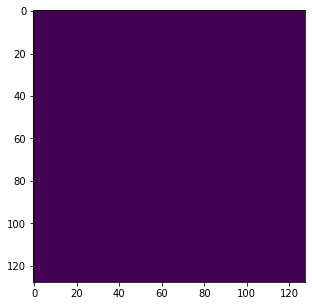

In [104]:
sample = np.load(r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025\ot\ot\sample9.npy").astype(float)
sample = sample.transpose(2, 1, 0)
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample.shape[0]):
    ax.imshow(sample[channel, :, :])

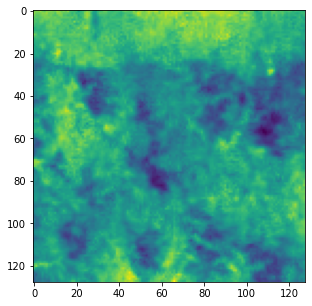

In [142]:
sampled_image = dataset.__getitem__(1900)[0]
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sampled_image.shape[0]):
    ax.imshow(sampled_image[channel, :, :])

In [145]:
sampled_image[24, 50: 60, 50: 60]

tensor([[537., 528., 536., 573., 623., 694., 712., 691., 708., 745.],
        [553., 547., 571., 556., 625., 678., 694., 666., 701., 695.],
        [620., 606., 605., 613., 594., 616., 612., 623., 672., 641.],
        [676., 687., 650., 612., 582., 605., 592., 603., 603., 621.],
        [714., 690., 681., 660., 648., 658., 640., 621., 596., 624.],
        [727., 720., 683., 641., 612., 621., 621., 627., 641., 627.],
        [708., 714., 728., 667., 602., 600., 611., 636., 667., 681.],
        [733., 719., 718., 674., 611., 595., 604., 650., 694., 720.],
        [751., 756., 733., 700., 664., 627., 618., 641., 690., 742.],
        [735., 727., 733., 721., 712., 674., 648., 660., 689., 730.]])

In [85]:
dataset.__len__()

1990

In [5]:
train_ds, val_ds = random_split(dataset, [0.9, 0.1])
print(len(train_ds), len(val_ds))

1791 199


In [6]:
normalization_data = pd.read_csv("normalization_data.csv")
means = normalization_data["means"]
stds = normalization_data["stds"]

In [7]:
class TransformSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, idx):
        image, label = self.subset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.subset)


In [8]:
transform_train = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.Normalize(mean=means,
                        std=stds),
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomVerticalFlip(p=0.5),
    # transforms.RandomRotation(degrees=45.0)
])
transform_val = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.Normalize(mean=means,
                        std=stds)
])
train_ds_transformed = TransformSubset(train_ds, transform=transform_train)
val_ds_transformed = TransformSubset(val_ds, transform=transform_val)

tensor(53, dtype=torch.int32)


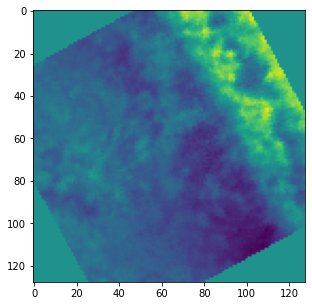

In [9]:
sampled_image_train, label = train_ds_transformed.__getitem__(551)
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sampled_image_train.shape[0]):
    ax.imshow(sampled_image_train[channel])
print(label)

In [10]:
sampled_image_train[60, 50: 60, 50: 60]

tensor([[-1.6023, -1.8134, -1.9694, -2.1255, -2.2081, -2.0000, -2.0000, -1.4982,
         -1.4615, -1.6451],
        [-1.6573, -1.6390, -1.7491, -1.8011, -1.9266, -2.0000, -1.7461, -1.4982,
         -1.4921, -1.6665],
        [-1.4768, -1.6390, -1.6696, -1.8011, -1.7369, -1.8440, -1.8837, -1.8011,
         -1.7491, -1.7430],
        [-1.5717, -1.7369, -1.6481, -1.5655, -1.5625, -1.6787, -2.0857, -2.0092,
         -2.0031, -2.0184],
        [-1.4493, -1.5349, -1.5135, -1.4493, -1.6604, -1.8409, -2.0153, -2.1010,
         -2.1775, -2.1102],
        [-1.3330, -1.4431, -1.3605, -1.4860, -1.5074, -1.8134, -2.0153, -1.9847,
         -2.1775, -2.1010],
        [-1.2779, -1.3636, -1.3605, -1.6298, -1.7124, -1.8379, -1.8379, -2.0765,
         -2.0918, -2.0245],
        [-1.3146, -1.4462, -1.4370, -1.4676, -1.7399, -1.6787, -1.8226, -2.1714,
         -2.1591, -1.8746],
        [-1.2840, -1.2993, -1.3024, -1.4187, -1.6206, -1.7583, -1.8868, -1.8746,
         -2.0153, -1.7644],
        [-1.1923, -

tensor(5041, dtype=torch.int32)


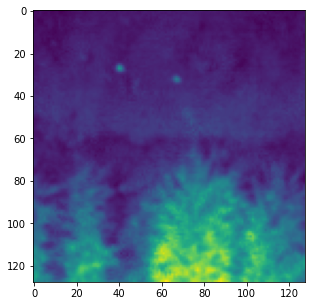

In [107]:
sampled_image_val, label = val_ds_transformed.__getitem__(80)
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sampled_image_val.shape[0]):
    ax.imshow(sampled_image_val[channel])
print(label)

In [242]:
sampled_image_val[28, 50: 60, 50: 60]

tensor([[2.5289, 2.0869, 1.8640, 1.8162, 1.3503, 1.0955, 1.1592, 1.2707, 1.2986,
         1.3304],
        [1.6211, 1.4140, 1.3583, 1.2229, 1.1273, 1.0756, 0.9601, 1.1552, 1.3224,
         1.2627],
        [1.3822, 1.2388, 1.0796, 1.0796, 1.0397, 1.0119, 1.2110, 1.3623, 1.3583,
         1.1751],
        [1.4698, 1.2428, 1.1074, 1.1074, 1.0517, 1.1871, 1.3623, 1.2348, 1.1672,
         1.2587],
        [1.4897, 1.3384, 1.3981, 1.3941, 1.2468, 1.1831, 1.3344, 1.3264, 1.2468,
         1.2269],
        [1.6370, 1.7923, 1.6290, 1.2428, 1.0875, 1.1831, 1.2866, 1.2667, 1.1910,
         1.2189],
        [1.4897, 1.5614, 1.5534, 1.3264, 1.2030, 1.2388, 1.4578, 1.3583, 1.2428,
         1.3185],
        [1.7007, 1.5574, 1.6370, 1.6569, 1.7246, 1.7166, 1.6251, 1.4339, 1.4578,
         1.5733],
        [2.0153, 1.9954, 1.9914, 1.8839, 1.9476, 1.7644, 1.6330, 1.5773, 1.5176,
         1.5574],
        [1.6251, 1.8042, 2.0073, 1.8321, 1.8361, 1.8640, 1.7724, 1.5534, 1.5335,
         1.7087]])

In [9]:
batch_size = 32

In [10]:
torch.manual_seed(42)

In [11]:
train_dl = DataLoader(train_ds_transformed, batch_size, shuffle=True)
val_dl = DataLoader(val_ds_transformed, batch_size, shuffle=False)

tensor([82, 74, 29, 84, 49, 19, 75, 65,  3, 88, 46, 66, 88,  3, 98,  8],
       dtype=torch.int32)
torch.Size([128, 128])


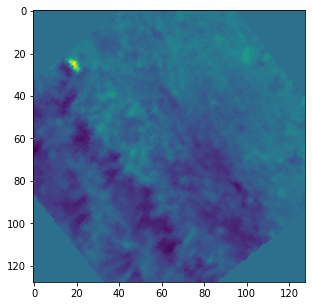

In [502]:
for image, label in train_dl:
    image = image[int(np.random.uniform(1, 33, 1))]
    fig, ax = plt.subplots(figsize=(10, 5))
    for channel in range(image.shape[0]):
        ax.imshow(image[channel])
    print(label)
    print(image[0].shape)
    break

tensor([76, 31, 54, 98, 42,  2, 11, 42, 25, 78, 81,  0, 39, 68, 79, 99, 66, 95,
        83, 90, 67, 66, 75, 33,  0,  3,  8, 66, 84, 30, 55, 26],
       dtype=torch.int32)
torch.Size([128, 128])


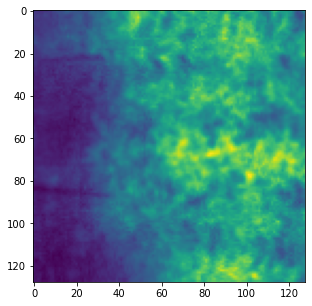

In [262]:
for image, label in val_dl:
    image = image[int(np.random.uniform(1, 33, 1))]
    fig, ax = plt.subplots(figsize=(10, 5))
    for channel in range(image.shape[0]):
        ax.imshow(image[channel])
    print(label)
    print(image[0].shape)
    break

In [12]:
class CNN(nn.Module):
    def __init__(self, in_channels=125):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, 250, kernel_size=3, padding=1),
            nn.BatchNorm2d(250),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(250, 500, kernel_size=3, padding=1),
            nn.BatchNorm2d(500),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(500, 1000, kernel_size=3, padding=1),
            nn.BatchNorm2d(1000),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(1000, 2000, kernel_size=3, padding=1),
            nn.BatchNorm2d(2000),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(output_size=(1, 1)),
            nn.Flatten()
        )
        self.regressor = nn.Sequential(
            nn.Linear(2000, 1000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1000, 500),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(500, 1)
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        return self.regressor(x)

In [13]:
model = CNN()

In [170]:
with torch.no_grad():
    model.eval()
    X = torch.ones(32, 125, 128, 128)
    one_try = model(X)

In [14]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode="min", factor=0.7, patience=10, threshold=1e-1, min_lr=1e-11)

In [15]:
for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cuda')

In [162]:
torch.cuda.empty_cache()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [50]:
def train(model, n_epochs, train_dl, val_dl, name, patience=None):
    loss_hist_train = [0] * n_epochs
    loss_hist_val = [0] * n_epochs
    counter = 0
    min_loss_val = float("inf")
    for epoch in range(n_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            pred = model(x_batch).squeeze(1)
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item() * y_batch.size(0)
        loss_hist_train[epoch] = loss_hist_train[epoch] / len(train_dl.dataset)
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in val_dl:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                pred = model(x_batch).squeeze(1)
                loss = loss_fn(pred, y_batch.float())
                loss_hist_val[epoch] += loss.item() * y_batch.size(0)
        loss_hist_val[epoch] = loss_hist_val[epoch] / len(val_dl.dataset)
        if loss_hist_val[epoch] > min_loss_val and patience != None:
            counter += 1
            if counter == patience:
                print(f"Early stop: Final epoch: [{epoch+1}/{n_epochs}], train loss: {loss_hist_train[epoch]}, val loss: {loss_hist_val[epoch]}")
                break
        else:
            counter = 0
            torch.save(model, f"{name}.pt")
        min_loss_val = min(min_loss_val, loss_hist_val[epoch])
        print(f"Epoch: [{epoch+1}/{n_epochs}], train loss: {loss_hist_train[epoch]}, val loss: {loss_hist_val[epoch]}")
        # scheduler.step(loss_hist_val[epoch])
    return loss_hist_train, loss_hist_val            

In [ ]:
n_epochs = 100
hist = train(model, n_epochs, train_dl, val_dl, name="cnn_4", patience=10)

Epoch: [1/100], train loss: 2446.948672671081, val loss: 961.445894327595
Epoch: [2/100], train loss: 939.6745384638034, val loss: 807.9996670670246
Epoch: [3/100], train loss: 906.452543717666, val loss: 796.2255555732766
Epoch: [4/100], train loss: 883.8992121796047, val loss: 796.6748123552331
Epoch: [5/100], train loss: 892.1901256703984, val loss: 838.4425212917615
Epoch: [6/100], train loss: 899.4649230514007, val loss: 784.0968163265055
Epoch: [7/100], train loss: 902.924227085678, val loss: 780.0495311027795
Epoch: [8/100], train loss: 883.3719099035216, val loss: 807.5822299976445
Epoch: [9/100], train loss: 896.3219324705123, val loss: 787.6440273265742
Epoch: [10/100], train loss: 892.6489931891446, val loss: 783.3026147583621
Epoch: [11/100], train loss: 904.138189659779, val loss: 800.5171964252414
Epoch: [12/100], train loss: 900.1113446873037, val loss: 817.7699097293106
Epoch: [13/100], train loss: 893.6859266152268, val loss: 791.7466743507576
Epoch: [14/100], train lo

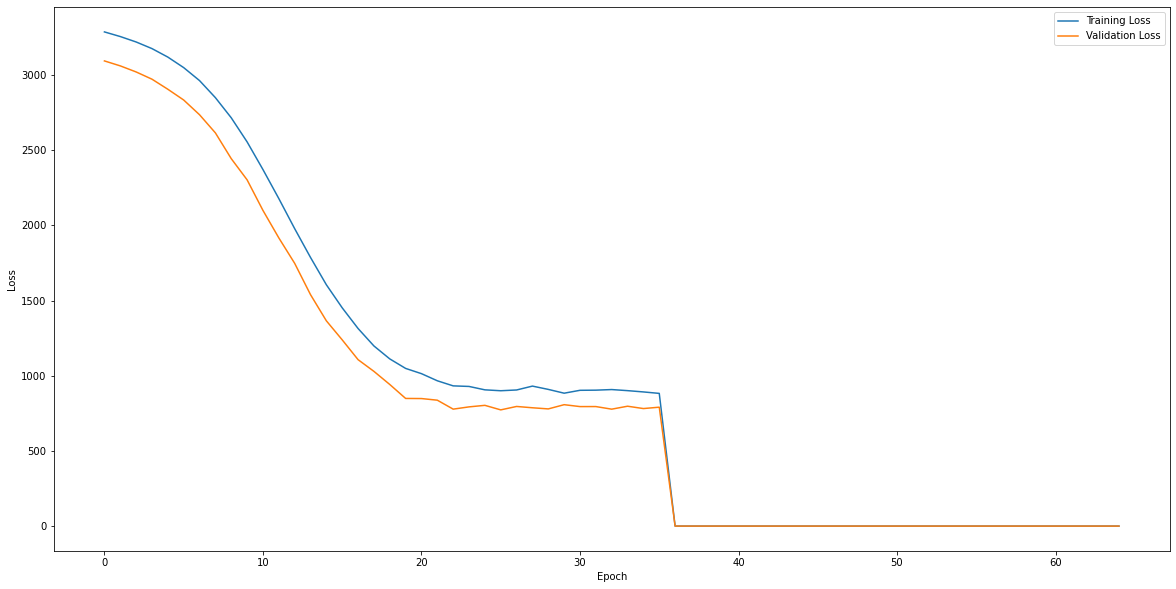

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(hist[0][:65], label="Training Loss")
ax.plot(hist[1][:65], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [17]:
model_ready = torch.load("cnn.pt", weights_only=False)
model_huber = torch.load("cnn_huber.pt", weights_only=False)
model_l1 = torch.load("cnn_l1.pt", weights_only=False)
model_huber_delta_5 = torch.load("cnn_huber_delta_5.pt", weights_only=False)
model_huber_delta_1_35 = torch.load("cnn_huber_delta_1.35.pt", weights_only=False)
model_4 = torch.load("cnn_4.pt", weights_only=False)

In [645]:
residuals = []
with torch.no_grad():
    model.eval()
    for x_batch, y_batch in val_dl:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        pred, y_batch = model_ready(x_batch).cpu().numpy().squeeze(), y_batch.cpu().numpy().squeeze()
        residuals.extend(abs(pred - y_batch))

In [648]:
print(f"Median absolute deviation: {np.median(residuals)}")

Median absolute deviation: 23.98651123046875


In [601]:
test = pd.read_csv("test.csv")
test

,id
0,sample1957.npy
1,sample1369.npy
2,sample782.npy
3,sample2255.npy
4,sample2160.npy
...,...
540,sample1313.npy
541,sample1656.npy
542,sample760.npy
543,sample718.npy


In [18]:
class AgriPredDataset(Dataset):
    def __init__(self, root_dir, num_channels):
        self.transform = transforms.Compose([
            transforms.Resize((128, 128)), 
            transforms.Normalize(mean=means,
                                std=stds)
        ])
        self.root_dir = Path(root_dir)
        self.test_dir = Path(self.root_dir) / "ot" / "ot"
        self.num_channels = num_channels
        # self.items_faulty = pd.read_csv("faulty_images.csv").values
        self.samples = []
        labels = pd.read_csv(self.root_dir / "test.csv")
        for label in labels.values:
            # if int(re.findall(r'\d+', label[0])[0]) in self.items_faulty:
            #     continue
            self.samples.append((self.test_dir / label[0], int(re.findall(r'\d+', label[0])[0])))
                    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, img_id = self.samples[idx]
        image = np.load(img_path).astype(float)
        image = image.transpose(2, 1, 0)
        image = torch.tensor(image, dtype=torch.float)
        
        if self.transform:
            image = self.transform(image)
            
        return image, img_id

In [19]:
test_dataset = AgriPredDataset(root_dir=r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025", num_channels=125)

In [23]:
test_dataset.__len__()

545

1957


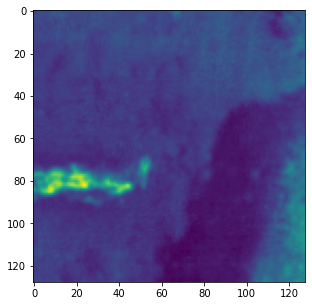

In [657]:
test_sample, id = test_dataset.__getitem__(0)
print(id)
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(test_sample.shape[0]):
    ax.imshow(test_sample[channel])

In [577]:
test_sample[10, 50: 60, 60: 80]

tensor([[0.7876, 0.8401, 0.9659, 1.0079, 0.8558, 0.8348, 0.8506, 0.7509, 0.7562,
         0.7562, 0.9240, 0.8820, 1.0551, 0.7457, 0.7509, 0.7142, 0.5202, 0.7247,
         0.9082, 0.9397],
        [0.9554, 0.9817, 0.8453, 0.7771, 0.8558, 0.6828, 0.7509, 0.8348, 0.5831,
         0.6775, 0.8506, 0.8034, 0.8925, 0.7981, 0.6513, 0.4835, 0.5464, 0.6093,
         0.7981, 0.9292],
        [0.8243, 0.9502, 0.7929, 0.7771, 0.7300, 0.6093, 0.7562, 0.7562, 0.6251,
         0.7247, 0.7247, 0.7300, 0.7509, 0.9869, 0.7195, 0.4835, 0.7247, 0.9082,
         0.7824, 0.9082],
        [0.7247, 0.6828, 0.8034, 0.8715, 0.6198, 0.5674, 0.7142, 0.6723, 0.6198,
         0.8768, 0.7037, 0.6828, 0.8139, 0.8820, 0.8139, 0.5936, 0.8663, 0.7929,
         0.6461, 0.6723],
        [0.7142, 0.6461, 0.6880, 0.6670, 0.4992, 0.5464, 0.6932, 0.5779, 0.5936,
         0.8768, 0.7247, 0.7352, 0.8296, 0.7771, 0.6093, 0.3839, 0.6670, 0.7300,
         0.5674, 0.7771],
        [0.6461, 0.6461, 0.6985, 0.5831, 0.6461, 0.7247, 0.6

In [20]:
test_batch_size = 1
test_dl = DataLoader(test_dataset, test_batch_size, shuffle=False)

In [21]:
def predict(model, test_dl, name):
    predictions = []
    model.eval()
    with torch.no_grad():
        for test_batch, id in test_dl:
            test_batch = test_batch.to(device)
            pred = model(test_batch)
            predictions.append((f"sample{id.cpu().numpy().squeeze()}.npy", pred.cpu().numpy().squeeze()))
    predictions = pd.DataFrame(predictions, columns=["ID", "TARGET"])
    predictions.to_csv(f"{name}.csv", index=False)
    return predictions

In [22]:
predictions = predict(model_4, test_dl, name="4 layers")
predictions

,ID,TARGET
0,sample1957.npy,45.98541
1,sample1369.npy,45.880096
2,sample782.npy,42.96826
3,sample2255.npy,44.23017
4,sample2160.npy,44.532772
...,...,...
540,sample1313.npy,44.717873
541,sample1656.npy,46.45246
542,sample760.npy,46.077904
543,sample718.npy,48.70288


<AxesSubplot:>

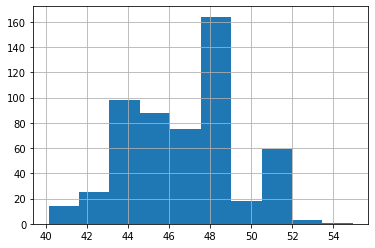

In [23]:
predictions["TARGET"].hist()